# 1. Data Loading and Preprocessing

In [1]:
## Import Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import sklearn

import warnings
warnings.filterwarnings('ignore')

import os

In [2]:
## Import Dataset

data = os.path.join(os.getcwd(), "HR-Employee-Attrition.csv")
df_origin = pd.read_csv(data)
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## 1.1 Check the distribution of the Attrition variable

It is a skewed dataset!!!


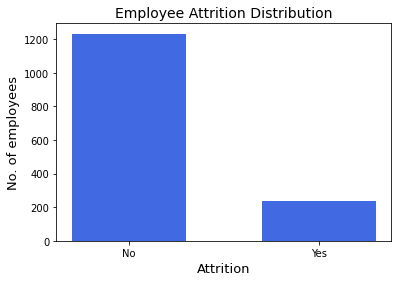

In [3]:
## Check if it is a skewed dataset

classes = ['No', 'Yes']
values = list(df_origin['Attrition'].value_counts())
plt.bar(classes, values, color ='royalblue', width=0.6)
 
plt.xlabel("Attrition", fontsize=13)
plt.ylabel("No. of employees", fontsize=13)
plt.title("Employee Attrition Distribution", fontsize=14)

# plt.savefig("Employee Attrition Distribution.png")

print("It is a skewed dataset!!!")

In [4]:
## Encode target variable 'Attrition' Yes/No by 1/0 respectively

df_origin['Attrition'] = df_origin['Attrition'].map({'Yes': 1, 'No': 0})

In [5]:
## Drop variables mentioned in the EDA jupyter notebook


var_drop_1 = ['Over18','EmployeeCount', 'EmployeeNumber', 'StandardHours',
              "HourlyRate", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "YearsSinceLastPromotion", "PerformanceRating",  "RelationshipSatisfaction",
              'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager', 'MonthlyIncome',
              'Education', 'Gender',
              'JobRole']
              
df_1 = df_origin.drop(var_drop_1, axis=1)

# 2. One-hot Encoding, Dataset Spliting and Oversampling

In [6]:
## Find categorical variables

categorical = [var for var in df_1.columns if df_1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)
for var in categorical:
    print("categorial var '{}' has {} classes".format(var, len(df_1[var].unique())))
    print(df_1[var].unique())

There are 5 categorical variables

The categorical variables are : ['BusinessTravel', 'Department', 'EducationField', 'MaritalStatus', 'OverTime']
categorial var 'BusinessTravel' has 3 classes
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
categorial var 'Department' has 3 classes
['Sales' 'Research & Development' 'Human Resources']
categorial var 'EducationField' has 6 classes
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
categorial var 'MaritalStatus' has 3 classes
['Single' 'Married' 'Divorced']
categorial var 'OverTime' has 2 classes
['Yes' 'No']


In [7]:
## Find numerical variables

numerical = [var for var in df_1.columns if df_1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 12 numerical variables

The numerical variables are : ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole']


## 2.1 One-hot Encoding

In [8]:
## Apply one-hot encoding to the categorical variables in our dataset

df_1 = pd.concat([df_1[numerical], 
                 pd.get_dummies(df_1[categorical], columns=categorical, prefix=categorical)], axis=1)

In [9]:
df_1.head()

,Age,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,StockOptionLevel,TrainingTimesLastYear,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,3,2,4,0,0,...,1,0,0,0,0,0,0,1,0,1
1,49,0,279,8,3,2,2,2,1,3,...,1,0,0,0,0,0,1,0,1,0
2,37,1,1373,2,4,2,1,3,0,3,...,0,0,0,1,0,0,0,1,0,1
3,33,0,1392,3,4,3,1,3,0,3,...,1,0,0,0,0,0,1,0,0,1
4,27,0,591,2,1,3,1,2,1,3,...,0,0,1,0,0,0,1,0,1,0


## 2.2 Dataset Spliting

In [10]:
## Split dataset into training and testing

from sklearn.model_selection import train_test_split

X, y = df_1.drop(['Attrition'], axis=1), df_1['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

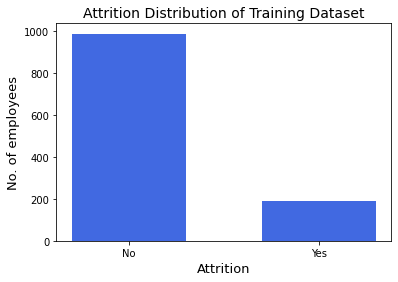

In [11]:
## Check the distribution of Attrtion variable in Training Dataset

classes = ['No', 'Yes']
values = list(y_train.value_counts())
plt.bar(classes, values, color ='royalblue', width=0.6)
 
plt.xlabel("Attrition", fontsize=13)
plt.ylabel("No. of employees", fontsize=13)
plt.title("Attrition Distribution of Training Dataset", fontsize=14)
plt.show()
# plt.savefig("Attrition Distribution of Training Dataset.png")

## 2.3 Apply Random Oversampling (ROS) on Training dataset

In [12]:
## Apply Random Oversampling on Training dataset

from imblearn.over_sampling import SMOTE, RandomOverSampler

# sm = SMOTE(random_state = 0)
# X_train, y_train = sm.fit_resample(X_train, y_train)
# print("Distribution of Training dataset after SMOTE")

ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

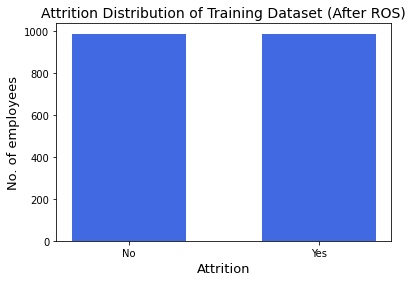

In [13]:
## Check the distribution of Attrition variable after ROS

classes = ['No', 'Yes']
values = list(y_train.value_counts())
plt.bar(classes, values, color ='royalblue', width=0.6)
 
plt.xlabel("Attrition", fontsize=13)
plt.ylabel("No. of employees", fontsize=13)
# plt.title("Attrition Distribution of Training Dataset (After Oversampling)", fontsize=14)
# plt.savefig("Attrition Distribution of Training Dataset (After Oversampling).png")
plt.title("Attrition Distribution of Training Dataset (After ROS)", fontsize=14)
plt.show()
# plt.savefig("Attrition Distribution of Training Dataset (After ROS).png")

In [14]:
# Size of Training Dataset

X_train.shape, y_train.shape

((1976, 28), (1976,))

# 3. Logistic Regression

## 3.1 Model Training

In [15]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# instantiate the model
logreg = LogisticRegressionCV(cv=5, random_state=0)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegressionCV(cv=5, random_state=0)

In [16]:
# Predictions on Training and Testing Dataset

y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Training-set accuracy score: 0.7525
Testing-set accuracy score: 0.7619


## 3.2 Logistic Regression Model Evaluation

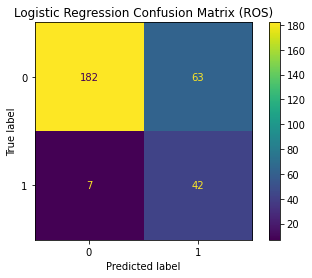

In [18]:
## Print the Confusion Matrix

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(logreg, X_test, y_test) 
plt.title('Logistic Regression Confusion Matrix (ROS)')
# plt.savefig('Logistic Regression Confusion Matrix (ROS).png')
plt.show()

In [19]:
## Get numbers from the Confusion Matrix

TP, TN, FP, FN = 42, 182, 63, 7

In [20]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7619


In [21]:
# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.4000


In [22]:
# print recall score

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8571


In [23]:
# print specificity score

specificity = TN / float(TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7429


In [24]:
# print f1-score

f1_score = 2 * (precision * recall / float(precision + recall))

print('F1-score : {0:0.4f}'.format(f1_score))

F1-score : 0.5455


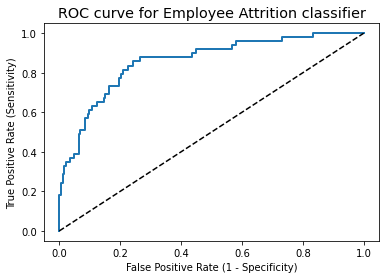

ROC AUC : 0.8571


In [25]:
# plot ROC Curve

from sklearn.metrics import roc_curve

y_pred1 = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Employee Attrition classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

## 3.3 Logistic Regression Coeffient and Odds Ratio

In [26]:
## Calculate Odds Ratio of Logistic Regression

coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",logreg.coef_.transpose())
coef_table.insert(len(coef_table.columns),"Odds_Ratio",np.exp(logreg.coef_.transpose()))

logreg_odds_ratio = coef_table.sort_values(["Odds_Ratio"], ascending=False).rename(
    columns={0: "Feature", "Coefs": "Coef", "Odds_Ratio": "Odds_Ratio"})
logreg_odds_ratio

# logreg_odds_ratio.to_csv("logreg_odds_ratio.csv", index=False)

,Feature,Coef,Odds_Ratio
27,OverTime_Yes,1.262636,3.534726
12,BusinessTravel_Travel_Frequently,1.121807,3.070398
25,MaritalStatus_Single,0.918512,2.505558
17,EducationField_Human Resources,0.643374,1.902890
22,EducationField_Technical Degree,0.635171,1.887346
16,Department_Sales,0.611904,1.843938
13,BusinessTravel_Travel_Rarely,0.485207,1.624511
24,MaritalStatus_Married,0.382296,1.465645
14,Department_Human Resources,0.270442,1.310544
15,Department_Research & Development,0.234012,1.263660


## 3.4 Append Model Predictions to Employee Dataset

In [27]:
employ_attrition_predict = pd.concat([pd.DataFrame(logreg.predict_proba(X)), pd.DataFrame(
    logreg.predict(X)).rename(columns={0: "Predict Atrrition Label"}), y], axis=1).rename(
    columns={0: "proba_No", 1: "proba_Yes", "Attrition": "Real Attrition Label"})
employ_attrition_predict["Predict Atrrition Label"] = employ_attrition_predict["Predict Atrrition Label"].map({1: "Yes", 0: "No"})
employ_attrition_predict["Real Attrition Label"] = employ_attrition_predict["Real Attrition Label"].map({1: "Yes", 0: "No"})

# employ_attrition_predict.to_csv("employ_attrition_predict.csv", index=False)

employ_attrition_predict_with_data = pd.concat([employ_attrition_predict, X], axis=1)
# employ_attrition_predict_with_data.to_csv("employ_attrition_predict_with_data.csv", index=False)

employ_attrition_predict_with_data

,proba_No,proba_Yes,Predict Atrrition Label,Real Attrition Label,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.214148,0.785852,Yes,Yes,41,1102,1,2,3,2,...,1,0,0,0,0,0,0,1,0,1
1,0.631011,0.368989,No,No,49,279,8,3,2,2,...,1,0,0,0,0,0,1,0,1,0
2,0.294597,0.705403,Yes,Yes,37,1373,2,4,2,1,...,0,0,0,1,0,0,0,1,0,1
3,0.529545,0.470455,No,No,33,1392,3,4,3,1,...,1,0,0,0,0,0,1,0,0,1
4,0.578342,0.421658,No,No,27,591,2,1,3,1,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.758788,0.241212,No,No,36,884,23,3,4,2,...,0,0,1,0,0,0,1,0,1,0
1466,0.854856,0.145144,No,No,39,613,6,4,2,3,...,0,0,1,0,0,0,1,0,1,0
1467,0.349429,0.650571,Yes,No,27,155,4,2,4,2,...,1,0,0,0,0,0,1,0,0,1
1468,0.610162,0.389838,No,No,49,1023,2,4,2,2,...,0,0,1,0,0,0,1,0,1,0


# 4. Random Forest

## 4.1 Model Training

In [28]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(n_estimators=50, random_state=0, max_depth=3)

# fit the model

rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=0)

In [29]:
# Predict the Training and Testing Dataset results

y_train = rfc.predict(X_train)
y_pred = rfc.predict(X_test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model training accuracy score with Random Forest : {0:0.4f}'. format(accuracy_score(y_train, y_train)))
print('Model testing accuracy score with Random Forest : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model training accuracy score with Random Forest : 1.0000
Model testing accuracy score with Random Forest : 0.7789


## 4.2 Random Forest Model Evaluation

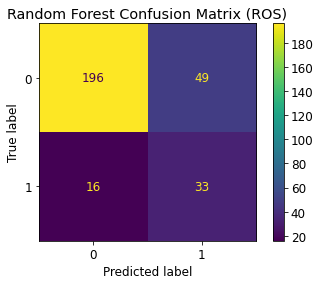

In [30]:
## Print the Confusion Matrix

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(rfc, X_test, y_test) 
plt.title('Random Forest Confusion Matrix (ROS)')
plt.show()
# plt.savefig('Random Forest Confusion Matrix.png (ROS).png')

In [31]:
TP, TN, FP, FN = 33, 196, 49, 16

In [32]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7789


In [33]:
# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.4024


In [34]:
# print recall score

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.6735


In [35]:
# print specificity score

specificity = TN / float(TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8000


In [36]:
# print f1-score

f1_score = 2 * (precision * recall / float(precision + recall))

print('F1-score : {0:0.4f}'.format(f1_score))

F1-score : 0.5038


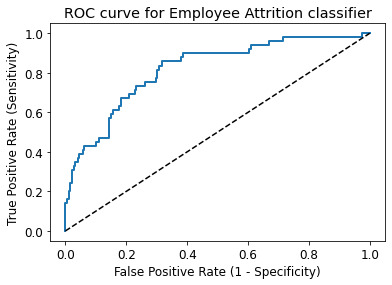

ROC AUC : 0.8172


In [37]:
# plot ROC Curve

from sklearn.metrics import roc_curve

y_pred1 = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Employee Attrition classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

# 5. Model Comparison: Logistic Regression v.s. Random Forest

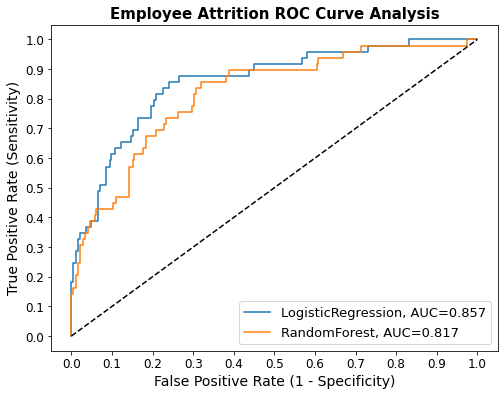

In [38]:
## Plot ROC curves for both of Logistic Regression and Random Forest model


from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [logreg, rfc]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Test the models and record the results
iter = 0
for cls in classifiers:
    yproba = cls.predict_proba(X_test)[:,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    if iter == 0:
        result_table = result_table.append({'classifiers':'LogisticRegression',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
        iter += 1
    else:
        result_table = result_table.append({'classifiers':'RandomForest',
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate (1 - Specificity)", fontsize=14)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate (Sensitivity)", fontsize=14)

plt.title('Employee Attrition ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# plt.savefig("Employee Attrition ROC Curve Analysis.png")